# Predicting if a customer is has a good or bad credit risk

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('german_credit_data.csv')
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## EDA

<AxesSubplot:>

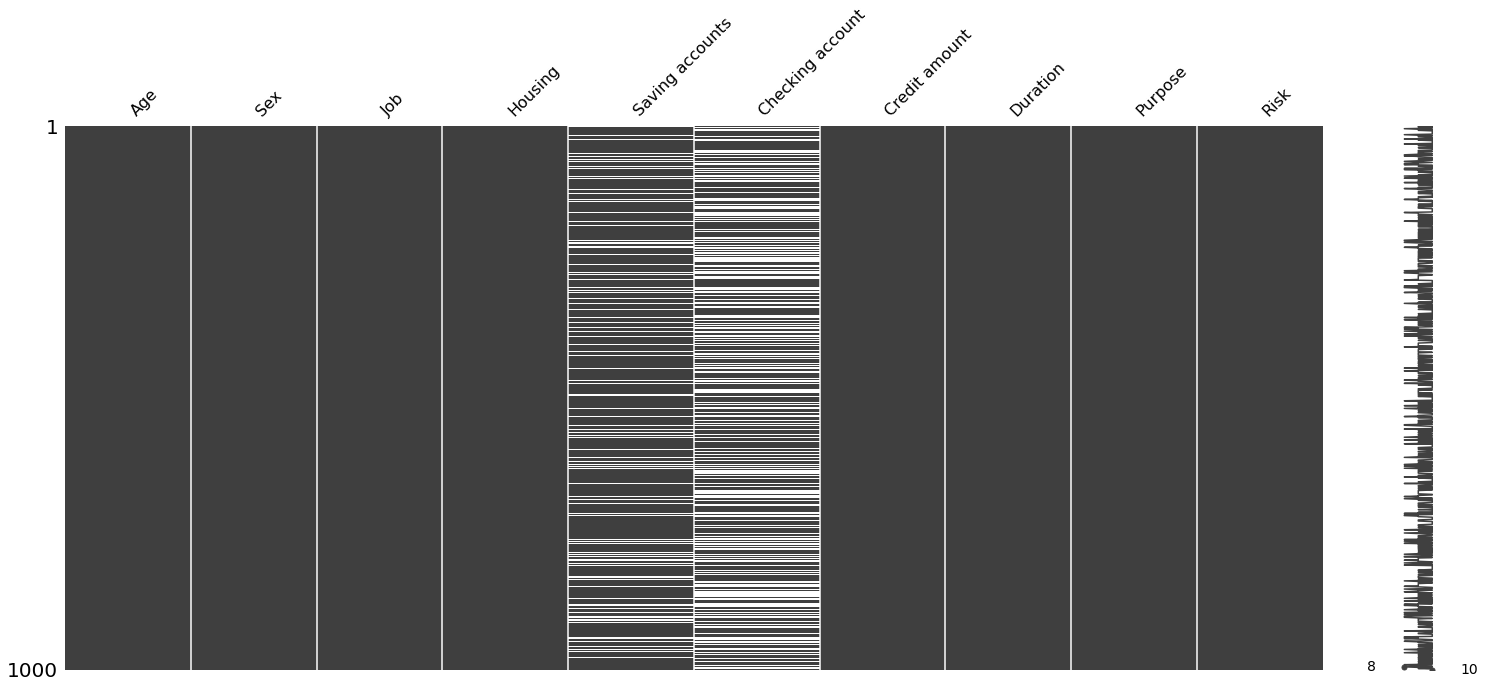

In [2]:
# look for missing data 

import missingno as msng
msng.matrix(df)

In [3]:
df.info()

# missing values in 'Saving accounts' & 'Checking accounts'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


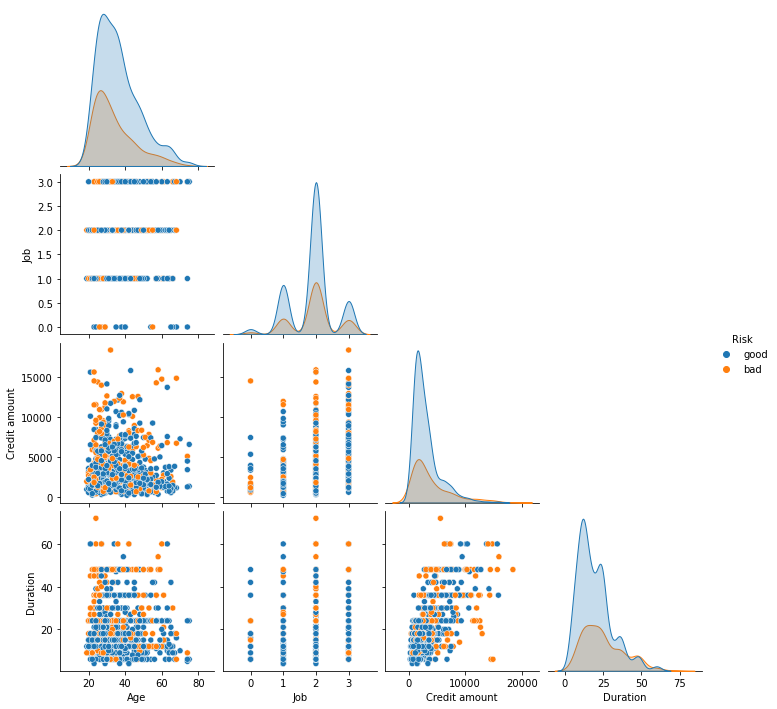

In [4]:
sns.pairplot(df, hue='Risk', corner=True)
plt.show()

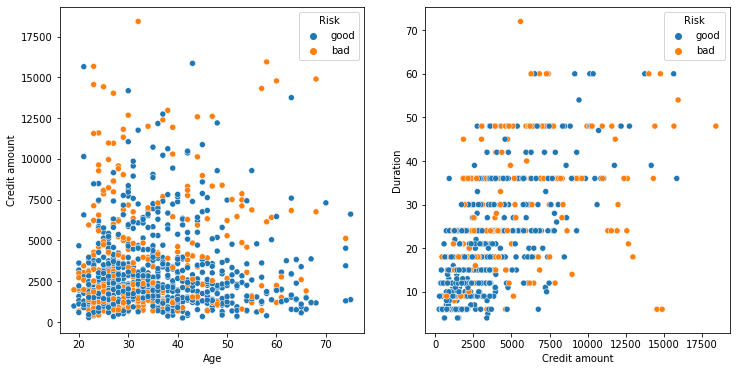

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Risk', ax=ax[0])
sns.scatterplot(data=df, x='Credit amount', y='Duration', hue='Risk', ax=ax[1])

plt.show()

### Imbalance dataset

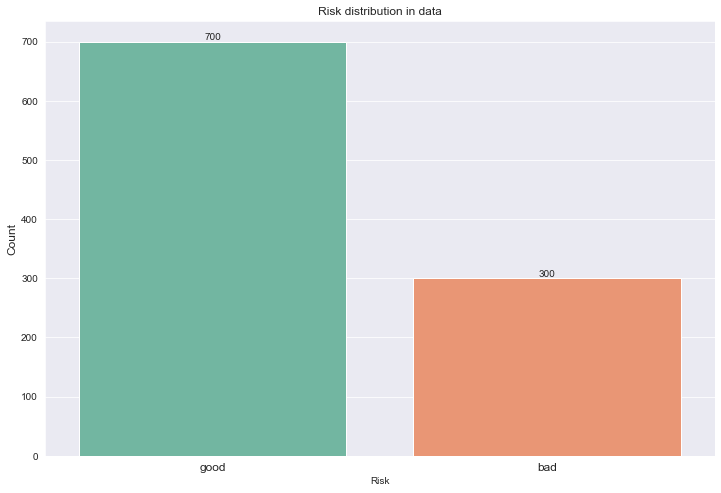

In [6]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

pal = sns.color_palette("Set2")

ax = sns.countplot(data=df, x='Risk', palette = pal)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
ax.bar_label(ax.containers[0])
plt.title('Risk distribution in data')

plt.show()

## Preprocessing 

In [7]:
def find_col(columns):
    for i in columns:
        print('Unique values', df[i].unique())

columns = ['Saving accounts', 'Checking account', 'Housing']        
find_col(columns)
        

Unique values [nan 'little' 'quite rich' 'rich' 'moderate']
Unique values ['little' 'moderate' nan 'rich']
Unique values ['own' 'free' 'rent']


### Making the categorical data into numerical

For 'Saving accounts' and 'Checking account' we are going to apply same logic by stateing, <br> 
0 = missing value <br>
1 = 'little' <br>
2 = 'moderate' <br>
3 = 'quite rich' <br>
4 = 'rich' <br>

And for housing we are going to apply same logic, <br>
0 = 'free' <br>
1 = 'rent' <br>
2 = 'own' 


In [8]:
# functions to encode values in column 

def text_encoder_SC(string):
    ''' this function change the values of the column 'Saving accounts' and 'Checking account'''
    
    if string == 'little':
        return 1 
    if string == 'moderate':
        return 2 
    if string == 'quite rich':
        return 3 
    if string == 'rich':
        return 4 

def text_encoder_H(string):
    if string == 'free':
        return 0 
    if string == 'rent':
        return 1 
    if string == 'own':
        return 2 

In [9]:
df['Saving accounts'] = df['Saving accounts'].apply(text_encoder_SC)
df['Checking account'] = df['Checking account'].apply(text_encoder_SC)
df['Housing'] =  df['Housing'].apply(text_encoder_H) 

In [10]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,2,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,2,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,2,1.0,NaN,2096,12,education,good
3,45,male,2,0,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,0,1.0,1.0,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,1.0,NaN,1736,12,furniture/equipment,good
996,40,male,3,2,1.0,1.0,3857,30,car,good
997,38,male,2,2,1.0,NaN,804,12,radio/TV,good
998,23,male,2,0,1.0,1.0,1845,45,radio/TV,bad


In [11]:
# Fill NaN values with 0 
df.fillna(0, inplace=True)

In [12]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,2,0.0,1.0,1169,6,radio/TV,good
1,22,female,2,2,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,2,1.0,0.0,2096,12,education,good
3,45,male,2,0,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,0,1.0,1.0,4870,24,car,bad


## EDA 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

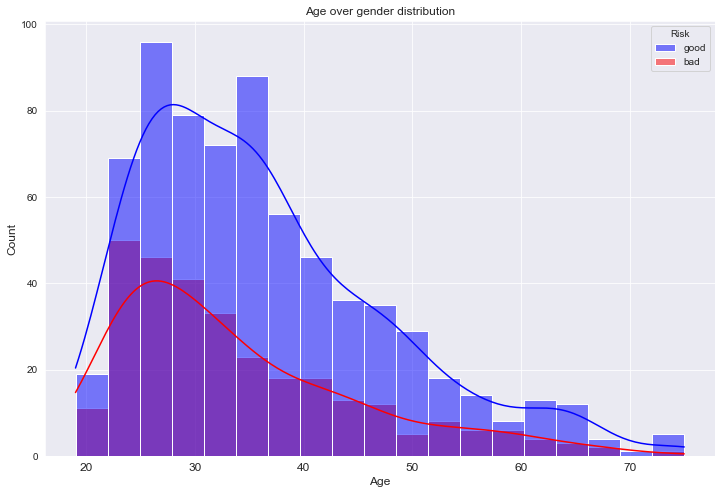

In [14]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.histplot(data=df, x='Age' ,hue='Risk', kde=True, palette=['b', 'r'])
plt.title('Age over gender distribution')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)

plt.show()

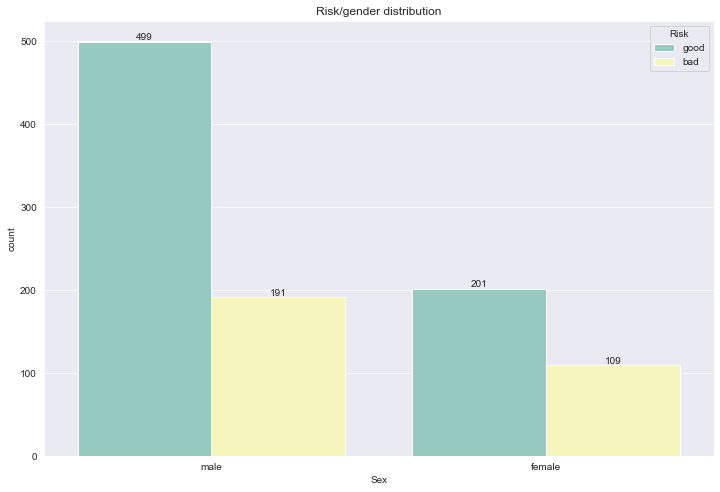

In [15]:
palette = sns.color_palette("Set3", 10)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.countplot(data = df, x='Sex', hue='Risk', palette=palette, color=['green','yellow'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Risk/gender distribution')
plt.show()

### Analysis
* Age affect risk on a low level <br>
* Males has higher count of credit <br>
* Males have lower percentage of bad rating than woman

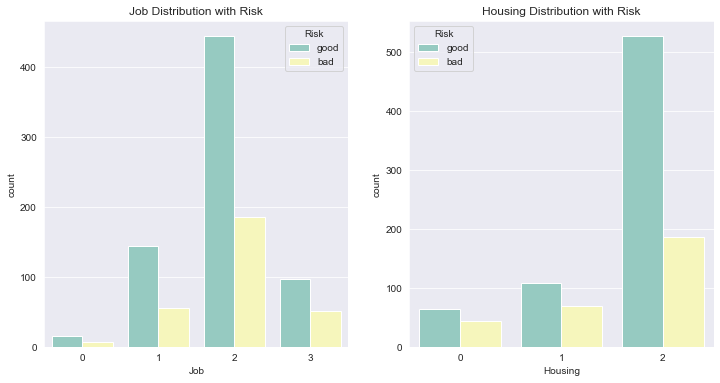

In [16]:
palette_1 = sns.color_palette("crest")

fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0], palette=palette).set_title("Job Distribution with Risk")

sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1], 
              palette=palette).set_title("Housing Distribution with Risk")

plt.show()

### Analysis
* Most of the people are in job skill 2, however the skills does not affect the risk! 
* People who owns their home has higher good rating and lower risk

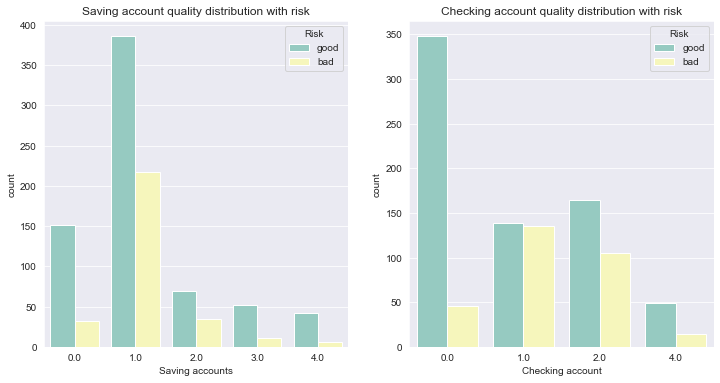

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0], palette=palette).set_title(
    'Saving account quality distribution with risk')

sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1], palette=palette
             ).set_title("Checking account quality distribution with risk")

plt.show()

### Analysis
* People with high savings tends to have less risk to the bank, but almost half of the people <br>
are in the category of 1, which means they are not rich!<br>

* About half of the people who have little checking account are considered as bad rating in risk. <br>



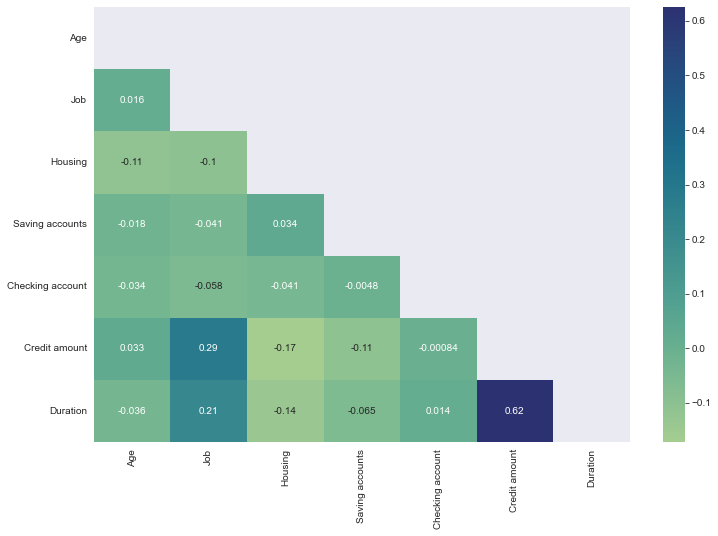

In [18]:
import numpy as np 
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(data=df.corr(), annot=True, cmap='crest'  ,mask=matrix)
plt.show()

# The Credit Amount is highly and positively related to the Duration.

## Data preprocessing for categorical columns

In [19]:
from sklearn.preprocessing import LabelEncoder

columns = ['Sex', 'Risk', 'Purpose']

# transform all categorical data into numerical 

for col in columns:
    LE = LabelEncoder()
    LE.fit(df[col])
    df[col] = LE.transform(df[col])
    
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0.0,1.0,1169,6,5,1
1,22,0,2,2,1.0,2.0,5951,48,5,0
2,49,1,1,2,1.0,0.0,2096,12,3,1
3,45,1,2,0,1.0,1.0,7882,42,4,1
4,53,1,2,0,1.0,1.0,4870,24,1,0


## Find number of clusters  

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
X = df.drop('Risk', axis=1)

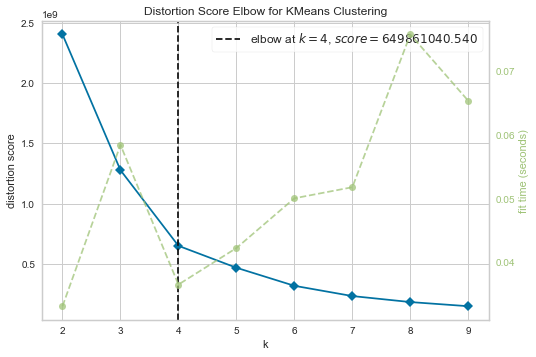

In [22]:
cluster = KMeans()

visualizer = KElbowVisualizer(cluster, k=(2,10))
visualizer.fit(X) # fit the data to the visualizer

visualizer.show()
plt.show()

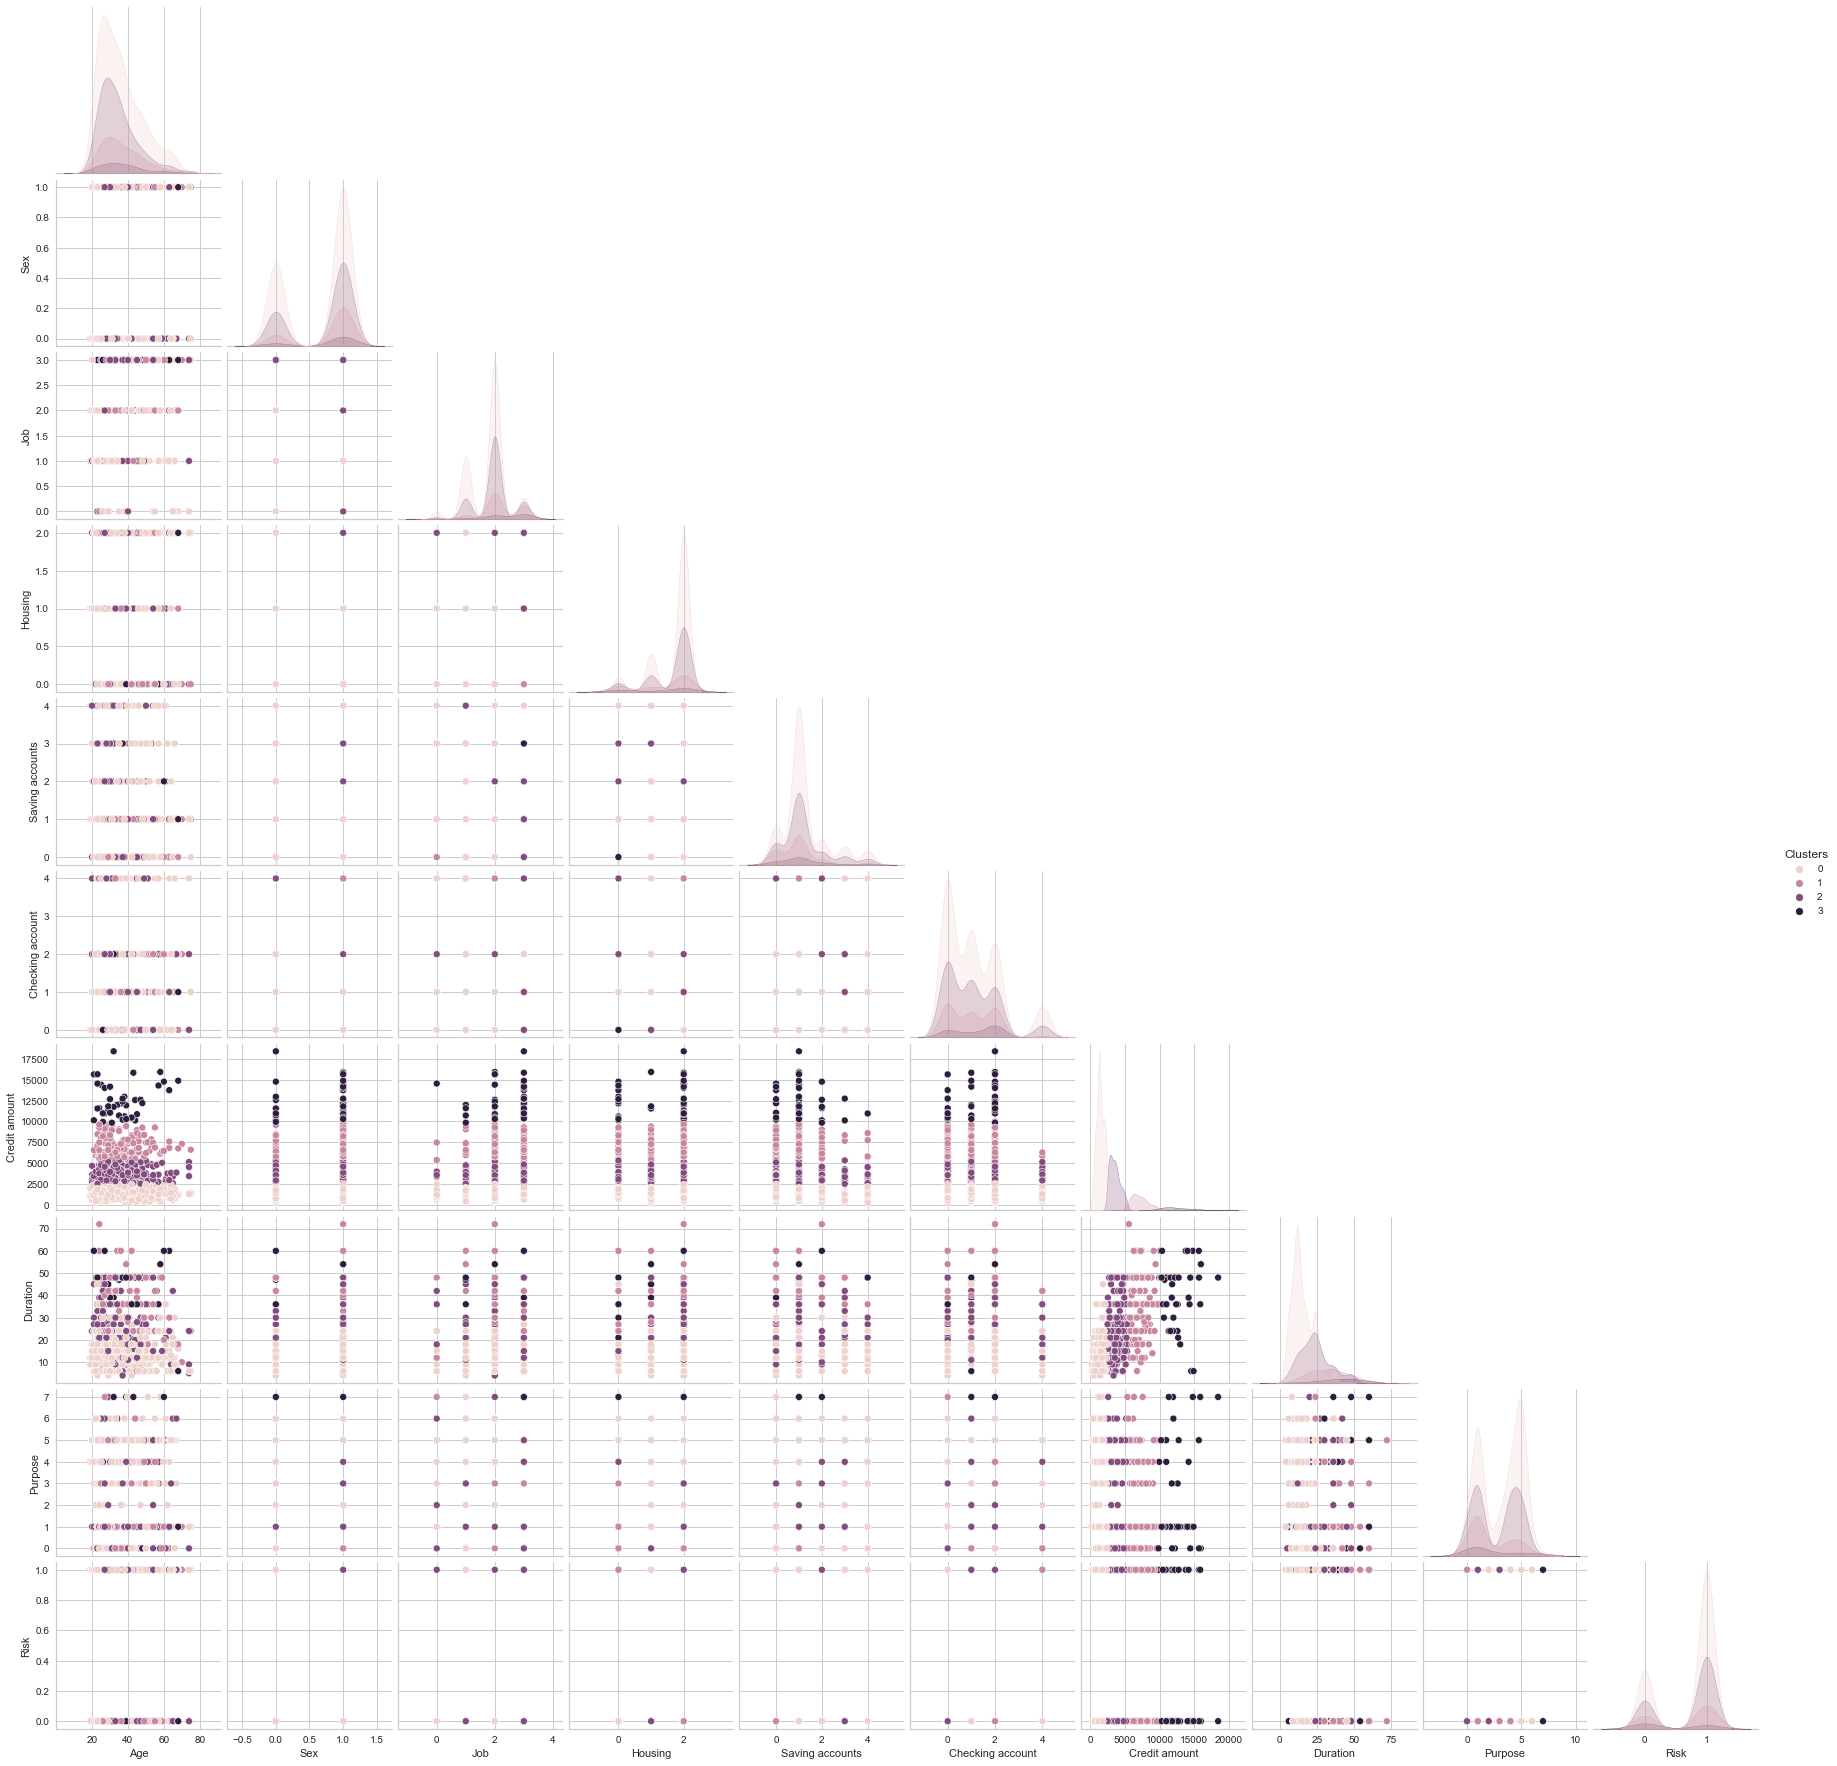

In [23]:
km = KMeans(n_clusters=4, random_state=42)
clusters = km.fit_predict(X)
df['Clusters'] = clusters
sns.pairplot(df, hue='Clusters', corner=True)
plt.show()

In [24]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Clusters
0,67,1,2,2,0.0,1.0,1169,6,5,1,0
1,22,0,2,2,1.0,2.0,5951,48,5,0,1
2,49,1,1,2,1.0,0.0,2096,12,3,1,0
3,45,1,2,0,1.0,1.0,7882,42,4,1,1
4,53,1,2,0,1.0,1.0,4870,24,1,0,2


In [25]:
category = {0 : 'No risk', 1 : 'Medium risk', 2: 'Low risk', 3: 'High risk'}

df['Clusters'] = df['Clusters'].map(category)

In [26]:
gp = df.groupby(['Risk', 'Clusters']).agg(func = {'Risk': 'count', 
                                             'Credit amount' : 'mean', 
                                             'Duration' : 'mean',
                                              'Age' : 'mean'})
round(gp, 1)

Risk  Credit amount  Duration   Age
Risk Clusters                                        
0    High risk      25        12913.0      37.0  36.4
     Low risk       81         3735.8      27.4  33.6
     Medium risk    47         7347.5      36.9  37.7
     No risk       147         1433.2      17.6  32.5
1    High risk      17        11921.6      45.1  37.1
     Low risk      206         3513.4      22.0  35.0
     Medium risk    83         7002.9      31.3  36.3
     No risk       394         1477.5      14.1  36.8

In [27]:
gp = df.groupby(['Risk', 'Clusters']).agg(func = {'Risk': 'count'
                                             })
gp.unstack().T

Risk                0    1
     Clusters             
Risk High risk     25   17
     Low risk      81  206
     Medium risk   47   83
     No risk      147  394

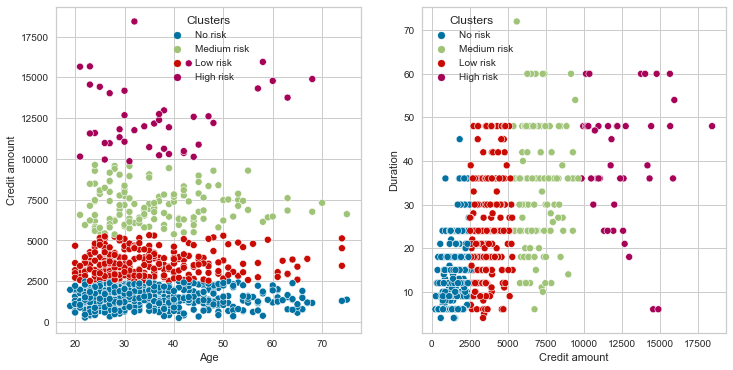

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Clusters', ax=ax[0])
sns.scatterplot(data=df, x='Credit amount', y='Duration', hue='Clusters', ax=ax[1])


plt.show()

## Train test split data and find important features

In [29]:
# import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


In [30]:
target = 'Risk'
X, y = df.drop(columns=[target, 'Clusters'], axis=1), df[target]

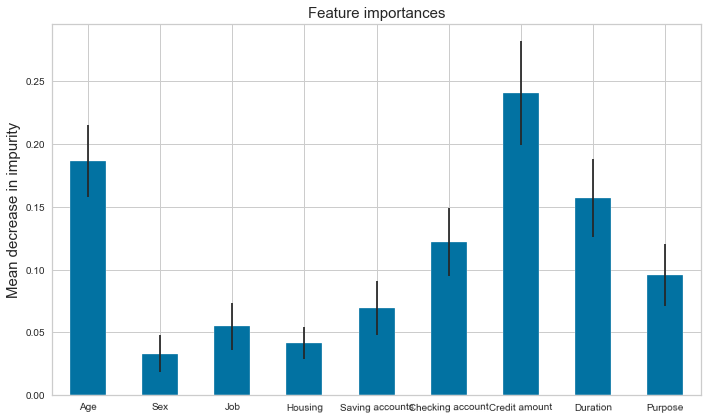

In [31]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=(1/3))

forest = RandomForestClassifier(random_state=42)
pipe = make_pipeline(StandardScaler(), forest)
pipe.fit(X_train, y_train)
feature_names = X.columns


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


forest_importances = pd.Series(importances)


fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances", fontsize=15)
ax.set_ylabel("Mean decrease in impurity", fontsize=15)
plt.xticks(range(X.shape[1]), feature_names)
plt.xticks(rotation=1)
fig.tight_layout()
plt.show()




## Model selection

In [32]:
# find model with the highest accuracy score

from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

target = 'Risk'
X, y = df.drop(columns=[target, 'Clusters', 'Sex', 'Job', 'Housing'], axis=1), df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=(1/3))


classifiers = [SVC(), 
              LogisticRegression(),
              SGDClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              ]

for classifier in classifiers:
    pipe = make_pipeline(StandardScaler(), classifier)
    # evaulate estimator performance  
    grid = GridSearchCV(estimator = pipe,
                       param_grid = {},
                       scoring = 'f1',
                       cv = 5)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    print(f'Classifier: {classifier} with score {score}')


Classifier: SVC() with score 0.8285068289357402
Classifier: LogisticRegression() with score 0.8100129358806534
Classifier: SGDClassifier() with score 0.7638220569676926
Classifier: RandomForestClassifier() with score 0.8043019633265243
Classifier: GaussianNB() with score 0.8125734902879473
Classifier: KNeighborsClassifier() with score 0.799390039683175
Classifier: DecisionTreeClassifier() with score 0.7356263956455231


## Hyperparameter tuning with SVC and RandomForest using RandomizedSearch

In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_SVC = {'svc__C' : [0.1, 0.01 , 0.001, 1, 5, 10],
                'svc__gamma' : [1, 0.1, 0.001, 0.0001]}

svc = SVC()
pipe = make_pipeline(StandardScaler(), svc)

random_svc = RandomizedSearchCV(estimator = pipe,
                    param_distributions = param_SVC,
                    cv = 5,
                    scoring = 'f1', error_score='raise'
                       )
random_svc = random_svc.fit(X_train, y_train)

print(f'Best scoring: {random_svc.best_score_}\nBest params: {random_svc.best_params_}')


Best scoring: 0.8338559267062653
Best params: {'svc__gamma': 0.1, 'svc__C': 5}


In [34]:
param_rfc = { 'randomforestclassifier__n_estimators' : [50, 100,200,250,300], 
                   'randomforestclassifier__min_samples_leaf' : [1,2,3],
                   'randomforestclassifier__max_depth' : [10,30,100, None]}
                  
                  
rfc = RandomForestClassifier()
                  
pipe = make_pipeline(StandardScaler(), rfc)

random_rfc = RandomizedSearchCV(estimator = pipe,
                    param_distributions = param_rfc,
                    cv = 10,
                    scoring = 'f1', error_score='raise'
                       )
random_rfc = random_rfc.fit(X_train, y_train)

print(f'Best scoring: {random_rfc.best_score_}\nBest params: {random_rfc.best_params_}')


Best scoring: 0.8323003156621895
Best params: {'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_depth': 30}


In [35]:
param_knn = {'kneighborsclassifier__n_neighbors' :  [1,3, 5, 11,19,24],
             'kneighborsclassifier__metric' : ['euclidean', 'manhattan']
                }
                  
knn = KNeighborsClassifier()
                  
pipe = make_pipeline(StandardScaler(), knn)

grid_knn = GridSearchCV(estimator = pipe,
                    param_grid = param_knn,
                    cv = 10,
                    scoring = 'f1', error_score='raise'
                       )
grid_knn = grid_knn.fit(X_train, y_train)
print(f'Best scoring: {grid_knn.best_score_}\nBest params: {grid_knn.best_params_}')

Best scoring: 0.8325202180210155
Best params: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 19}


In [36]:
param_logreg = {'logisticregression__C' : [0.1, 1, 10, 100, 1000],
               }
logreg = LogisticRegression()

pipe = make_pipeline(StandardScaler(), logreg)

grid_logreg = GridSearchCV(estimator = pipe,
                    param_grid = param_logreg,
                    cv = 10,
                    scoring = 'f1', error_score='raise'
                       )
grid_logreg = grid_logreg.fit(X_train, y_train)

print(f'Best scoring: {grid_logreg.best_score_}\nBest params: {grid_logreg.best_params_}')

Best scoring: 0.8131385336516705
Best params: {'logisticregression__C': 1}


## Baseline to beat 

In [37]:
from sklearn.dummy import DummyClassifier

strat = ['most_frequent', 'prior', 'stratified', 'uniform']

for i in strat: 
    dummy = DummyClassifier(strategy=i , random_state=42)

    dummy.fit(X_train, y_train)
    baseline = dummy.score(X_test, y_test)
    print(f'With strat {i}, the baseline is an accuracy of {baseline}')
    
# need to beat the baseline 0.695

With strat most_frequent, the baseline is an accuracy of 0.6946107784431138
With strat prior, the baseline is an accuracy of 0.6946107784431138
With strat stratified, the baseline is an accuracy of 0.5688622754491018
With strat uniform, the baseline is an accuracy of 0.5239520958083832


## Evaulate the test data

In [38]:
# Actual score on the test data

trained_models = {
    'SVC' : random_svc,
    'RandomForestClassifier' : random_rfc,
    'KNeighborsClassifier' : grid_knn,
    'LogisticRegression' : grid_logreg
}

for name, model in trained_models.items():
    score = model.score(X_test, y_test)
    params = model.best_params_
    
    print(f'Score for {name}: {score} with param {params}\n')

Score for SVC: 0.8262548262548263 with param {'svc__gamma': 0.1, 'svc__C': 5}

Score for RandomForestClassifier: 0.8433268858800774 with param {'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_depth': 30}

Score for KNeighborsClassifier: 0.8188976377952756 with param {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 19}

Score for LogisticRegression: 0.8103130755064457 with param {'logisticregression__C': 1}



## Confusion matrix with f1 score as metric

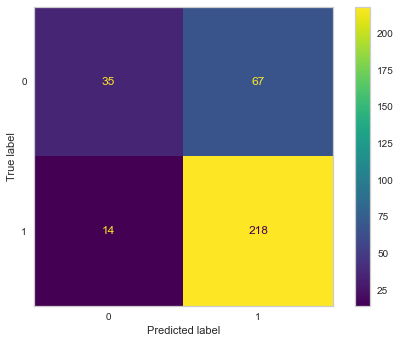

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
pred = random_rfc.predict(X_test)
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_knn.classes_).plot()
plt.grid(None)

plt.show()



In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.34      0.46       102
           1       0.76      0.94      0.84       232

    accuracy                           0.76       334
   macro avg       0.74      0.64      0.65       334
weighted avg       0.75      0.76      0.73       334

